In [272]:
#importando as bibliotecas
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import tokenize
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [273]:
# Leitura da base de dados.
base_news = pd.read_csv("pre-processed-new.csv", sep=",")
base_news

,index,label,preprocessed_news
0,0,pos,A maior vantagem do Bitcoin é sua descentraliz...
1,1,pos,O que faz entrar na segunda principal caracter...
2,2,pos,O Bitcoin é mundial sendo possível enviar e re...
3,3,pos,As taxas praticadas pela rede do Bitcoin são e...
4,4,pos,BTC não pode ser falsificado
...,...,...,...
382,400,neg,A complexidade das carteiras de criptomoedas e...
383,401,neg,A integração também é um problema. As aplicaçõ...
384,402,neg,Os protocolos e os serviços de integração estã...
385,403,neg,A incerteza regulamentar e a falta de normas i...


In [274]:
# Organização do dados.
base_news['sentiment'] = base_news['label']
base_news = base_news.drop(columns=['index','label'])
base_news

,preprocessed_news,sentiment
0,A maior vantagem do Bitcoin é sua descentraliz...,pos
1,O que faz entrar na segunda principal caracter...,pos
2,O Bitcoin é mundial sendo possível enviar e re...,pos
3,As taxas praticadas pela rede do Bitcoin são e...,pos
4,BTC não pode ser falsificado,pos
...,...,...
382,A complexidade das carteiras de criptomoedas e...,neg
383,A integração também é um problema. As aplicaçõ...,neg
384,Os protocolos e os serviços de integração estã...,neg
385,A incerteza regulamentar e a falta de normas i...,neg


In [275]:
# Importação das stop_words e string para auxiliar na execução de processamento do spacy
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
import string
pontuacoes = string.punctuation
stop_words = STOP_WORDS

#Pipeline inglês otimizado
import  en_core_web_sm 
nlp = en_core_web_sm.load()

In [276]:
# Função para remover stop word, pontuações e digitos.
def preprocessamento(texto):
    texto = str(texto).lower()
    documento = nlp(texto)
    
    lista = []
    for token in documento:
        #lista.append(token.text)
        lista.append(token.lemma_)
        
    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
    lista = ' '.join([(elemento) for elemento in lista if not elemento.isdigit()])
    
    return lista

In [277]:
base_news["new_preprocessed"] = base_news['preprocessed_news'].apply(preprocessamento)

In [278]:
base_news

,preprocessed_news,sentiment,new_preprocessed
0,A maior vantagem do Bitcoin é sua descentraliz...,pos,vantagem bitcoin descentralização existindo en...
1,O que faz entrar na segunda principal caracter...,pos,entrar principal característica criptoativo al...
2,O Bitcoin é mundial sendo possível enviar e re...,pos,bitcoin mundial sendo enviar receber criptomoe...
3,As taxas praticadas pela rede do Bitcoin são e...,pos,taxas praticadas rede bitcoin extremamente bai...
4,BTC não pode ser falsificado,pos,btc falsificado
...,...,...,...
382,A complexidade das carteiras de criptomoedas e...,neg,complexidade carteiras criptomoedas tecnologia...
383,A integração também é um problema. As aplicaçõ...,neg,integração problema aplicações blockchain ofer...
384,Os protocolos e os serviços de integração estã...,neg,protocolo serviços integração aparecer continu...
385,A incerteza regulamentar e a falta de normas i...,neg,incerteza regulamentar normas internacionais t...


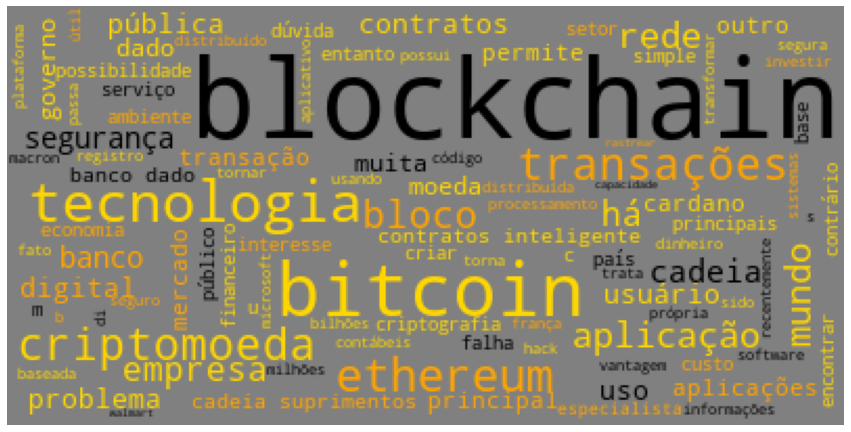

In [279]:
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import matplotlib.pyplot as plt
color_map = ListedColormap(['orange', 'black', 'gold'])
cloud = WordCloud(background_color = 'gray', max_words=100, colormap=color_map)

cloud = cloud.generate(base_news["new_preprocessed"].to_string())
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()


In [280]:
frases = []
classes = []
soma_fake = 0
soma_true = 0

for frase, classe in zip(base_news['new_preprocessed'], base_news['sentiment']):
    if 'blockchain' in frase:
        frases.append(frase)
        classes.append(classe)
        
resultado_df = pd.DataFrame({'Frases': frases, 'Sentiments': classes})
resultado_df  

,Frases,Sentiments
0,modo resumido blockchain permite rapidez efici...,pos
1,tecnologia blockchain garante segurança extr...,pos
2,gira torno tecnologia blockchain criptografia ...,pos
3,desenvolvimento código blockchain consenso ope...,pos
4,rebaixado código blockchain suportado centenas...,pos
...,...,...
255,tecnologia blockchain impacto óbvio economia m...,neg
256,complexidade carteiras criptomoedas tecnologia...,neg
257,integração problema aplicações blockchain ofer...,neg
258,protocolo serviços integração aparecer continu...,neg


In [281]:
resultado_agrupado = resultado_df.groupby('Sentiments').count()
resultado_agrupado['Porcentagem'] = [25/154*100, 39/154*100]
resultado_agrupado

,Frases,Porcentagem
Sentiments,,
neg,71,16.233766
pos,189,25.324675


In [282]:
#Realização de Treino e teste
import sklearn

In [283]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(base_news.preprocessed_news,
                                                             base_news.sentiment,
                                                             random_state = 5)

In [284]:
teste

153    O protocolo da linha de base suporta contratos...
383    A integração também é um problema. As aplicaçõ...
108    As transações no entanto não são registradas u...
49     Especialistas apontam a blockchain como uma da...
315    Os livros das Blockchains podem crescer muito ...
                             ...                        
24     Você pode enviar bitcoins para qualquer país d...
33     Bitcoin é um software totalmente aberto livre ...
340    O maior trunfo da Blockchain é o fato de que p...
237    De acordo com Katz o YellowHeart usa o blockch...
234    A medida que o mundo se move mais para uma eco...
Name: preprocessed_news, Length: 97, dtype: object

In [285]:
treino

252    Outro problema de cadeia de suprimentos que po...
6          Transações contábeis serão quase instantâneas
10     Segundo a Forbes esses novos modelos de transa...
304    Cada transação com um blockchain deve ser assi...
132    O blockchain também é útil para confirmar a or...
                             ...                        
73     O XRP possui custos de transações mais baixos ...
118    Qualquer mudança na blockchain se torna públic...
189    A tecnologia blockchain ficou conhecida por se...
206    Macron disse ainda que o sistema blockchain de...
355    A mudança era incompatível com as versões ante...
Name: preprocessed_news, Length: 290, dtype: object

In [286]:
classe_treino

252    pos
6      pos
10     pos
304    neg
132    pos
      ... 
73     pos
118    pos
189    pos
206    pos
355    neg
Name: sentiment, Length: 290, dtype: object

In [287]:
classe_teste

153    pos
383    neg
108    pos
49     pos
315    neg
      ... 
24     pos
33     pos
340    neg
237    pos
234    pos
Name: sentiment, Length: 97, dtype: object

In [288]:
# Contagem de dados positivos e negativos

print(base_news.sentiment.value_counts())

pos    273
neg    114
Name: sentiment, dtype: int64


In [289]:
#Classificando os sentimentos em 1 "Positivo" 0 "Negativo"
classificacao = base_news["sentiment"].replace(["neg","pos"], [0,1])
base_news["classificacao"] = classificacao


In [290]:
base_news

,preprocessed_news,sentiment,new_preprocessed,classificacao
0,A maior vantagem do Bitcoin é sua descentraliz...,pos,vantagem bitcoin descentralização existindo en...,1
1,O que faz entrar na segunda principal caracter...,pos,entrar principal característica criptoativo al...,1
2,O Bitcoin é mundial sendo possível enviar e re...,pos,bitcoin mundial sendo enviar receber criptomoe...,1
3,As taxas praticadas pela rede do Bitcoin são e...,pos,taxas praticadas rede bitcoin extremamente bai...,1
4,BTC não pode ser falsificado,pos,btc falsificado,1
...,...,...,...,...
382,A complexidade das carteiras de criptomoedas e...,neg,complexidade carteiras criptomoedas tecnologia...,0
383,A integração também é um problema. As aplicaçõ...,neg,integração problema aplicações blockchain ofer...,0
384,Os protocolos e os serviços de integração estã...,neg,protocolo serviços integração aparecer continu...,0
385,A incerteza regulamentar e a falta de normas i...,neg,incerteza regulamentar normas internacionais t...,0


In [291]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Bitcoin é um bom investimento", "Bitcoin não é um bom investimento", "Bitcoin é um investimento muito muito bom"]

#Variável para vetorizar.

vetorizar = CountVectorizer(lowercase=False ) # (lowercase=False)Manter formato de texto original, maiusculas e minusculas.

# Criação da representação Bag of Words.

bag_of_words = vetorizar.fit_transform(texto)

In [292]:
#Retorna as palavras do vocabulário

vetorizar.get_feature_names()

['Bitcoin', 'bom', 'investimento', 'muito', 'não', 'um']

In [293]:
#tipo de matriz.
#Matrizes esparsas são matrizes nas quais a maioria das posições é preenchida por zeros.
bag_of_words

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [294]:
#Incluindo a funcionalidade .sparse.from_spmatrix para gerar a matriz.
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                     columns=vetorizar.get_feature_names())

In [295]:
matriz_esparsa

# ["Bitcoin é um bom investimento", "Bitcoin não é um bom investimento", "Bitcoin é um investimento muito muito bom"]

,Bitcoin,bom,investimento,muito,não,um
0,1,1,1,0,0,1
1,1,1,1,0,1,1
2,1,1,1,2,0,1


In [296]:
#Vetorizando dados de testes e treino

vetorizar = CountVectorizer(lowercase=False, max_features = 50)
bag_of_words = vetorizar.fit_transform(base_news.new_preprocessed)
bag_of_words.shape

(387, 50)

In [297]:
# Variavel para receber o os dados da coluna new_preprocessed

todas_palavras = ' '.join([str(texto) for texto in base_news.new_preprocessed])

In [298]:
import nltk
frase = ["Ethereum é a melhor moeda"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'Ethereum é a melhor moeda': 1})

In [299]:
#Tokenizando as frases com biblioteca NLTK


from nltk import tokenize
frase = "Ethereum é a melhor moeda"

espaco_token = tokenize.WhitespaceTokenizer()
frase_token = espaco_token.tokenize(frase)
print(frase_token)

['Ethereum', 'é', 'a', 'melhor', 'moeda']


In [300]:
frase_token = espaco_token.tokenize(todas_palavras)
frequencia = nltk.FreqDist(frase_token)

In [301]:
#Função para buscar as palavras que mais aparecem na base.

df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                             "Frequencia": list(frequencia.values())})
frequencia


FreqDist({'blockchain': 310, 'bitcoin': 90, 'transações': 84, 'tecnologia': 62, 'rede': 47, 'dado': 40, 'criptomoeda': 39, 'segurança': 37, 'informações': 32, 'ethereum': 32, ...})

In [302]:
#Função para classificar sentimentos

from sklearn.linear_model import LogisticRegression



def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features = 50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                             texto[coluna_classificacao],
                                                             random_state = 150)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

classificar_texto(base_news,"new_preprocessed", "classificacao")


#Resultado da Acuracia dos dados

0.7731958762886598